<a href="https://colab.research.google.com/github/hiswordsini/AI_Bootcamp_Project/blob/main/Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [138]:
df = pd.read_csv('/content/gdrive/MyDrive/vgames2.csv')
df

#1.지역에 따라 선호하는 게임 장르가 다를까
#2.연도별 게임의 트렌드가 있을까
#3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 함

#숫자 데이터 단위 통일
#지역별 가장 많이 팔린 게임 시각화
#지역별 가장 많이 팔린 게임 TOP20 게임 장르 비교 --> 1번의 문제에 답
#연도별 가장 많이 팔린 게임 분석 ---> Trend가 있는지 파악(K-means clustering?)
#국내 출시를 목표로 가장 즐겨할만한 게임의 장르와 플랫폼을 생각한다.
#-->Other_Sales에서 가장 판매량이 높은 장르와 플랫폼을 시각화 한다.
#-->트렌드에 기반하여 다음 분기에 설계할 게임의 장르와 플랫폼을 제안한다.


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [34]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [139]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [140]:
#Year의 결측 데이터는 모두 Cancelled 된 게임들이므로 제외함.
df.dropna(subset = ['Year'], inplace = True)

In [54]:
df.isnull().sum()

Unnamed: 0      0
Name            0
Platform        0
Year            0
Genre           0
Publisher      45
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [141]:
#Years 데이터 타입을 int로 변환
def value_to_int(x):
  return int(x)
df['Year'] = df['Year'].apply(value_to_int)

In [142]:
#Sales 데이터의 단위를 M으로 통일
def value_to_float(x):
  if type(x) == float or type(x) == int:
    return x
  elif 'K' in x:
    return float(x.replace('K', ''))*1/1000
  elif 'M' in x:
    return float(x.replace('M', ''))
  else:
    return float(x)

df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [143]:
#drop dubplicates
df.drop_duplicates(inplace=True)

In [71]:
#각 지역별 가장 많이 팔린 게임
NA_max = df.iloc[df['NA_Sales'].argmax()]
print("NA_max_game :", NA_max)
EU_max = df.iloc[df['EU_Sales'].argmax()]
print("EU_max_game :", EU_max)
JP_max = df.iloc[df['JP_Sales'].argmax()]
print("JP_max_game :", JP_max)
Other_max = df.iloc[df['Other_Sales'].argmax()]
print("Other_max_game :", Other_max)


NA_max_game : Unnamed: 0           2909
Name           Wii Sports
Platform              Wii
Year                 2006
Genre              Sports
Publisher        Nintendo
NA_Sales            41.49
EU_Sales            29.02
JP_Sales             3.77
Other_Sales          8.46
Name: 2908, dtype: object
EU_max_game : Unnamed: 0           2909
Name           Wii Sports
Platform              Wii
Year                 2006
Genre              Sports
Publisher        Nintendo
NA_Sales            41.49
EU_Sales            29.02
JP_Sales             3.77
Other_Sales          8.46
Name: 2908, dtype: object
JP_max_game : Unnamed: 0                         7830
Name           Pokemon Red/Pokemon Blue
Platform                             GB
Year                               1996
Genre                      Role-Playing
Publisher                      Nintendo
NA_Sales                          11.27
EU_Sales                           8.89
JP_Sales                          10.22
Other_Sales               

In [144]:
NA_Best = df.sort_values('NA_Sales',ascending=False).head(50)  

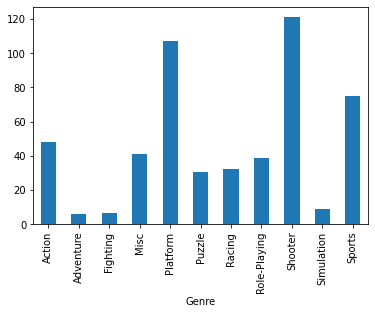

In [145]:
NA_Best.groupby('Genre').NA_Sales.sum().plot.bar()

In [147]:
EU_Best = df.sort_values('EU_Sales',ascending=False).head(50)

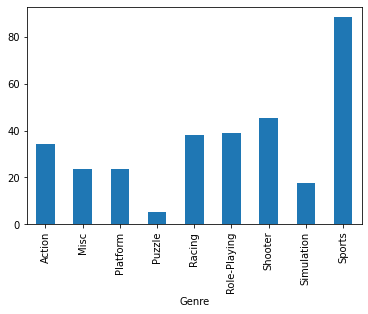

In [148]:
EU_Best.groupby('Genre').EU_Sales.sum().plot.bar()

In [149]:
JP_Best = df.sort_values('JP_Sales',ascending=False).head(50)

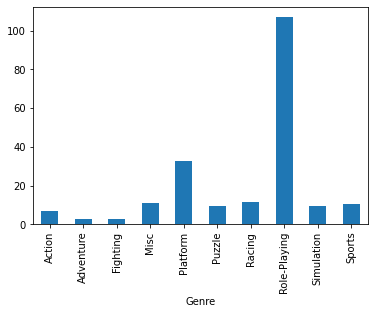

In [150]:
JP_Best.groupby('Genre').JP_Sales.sum().plot.bar()

In [151]:
Other_Best = df.sort_values('Other_Sales',ascending=False).head(50)


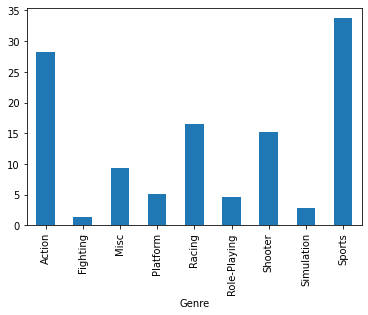

In [152]:
Other_Best.groupby('Genre').Other_Sales.sum().plot.bar()

In [153]:
df['Global_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [154]:
Global_Best = df.sort_values('Global_Sales', ascending=False).head(50)

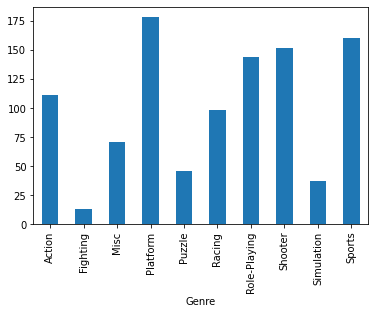

In [155]:
Global_Best.groupby('Genre').Global_Sales.sum().plot.bar()

In [156]:
import matplotlib.pyplot as plt
import numpy as np

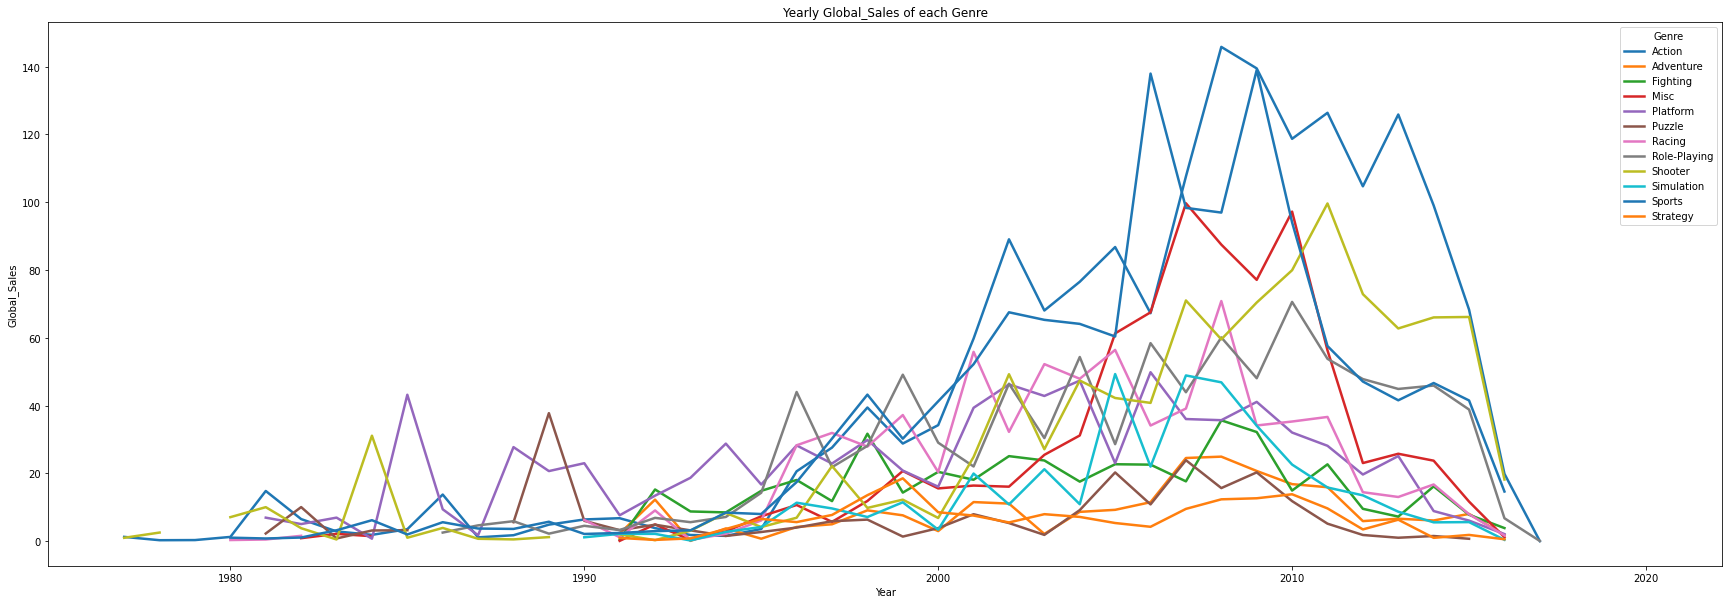

In [157]:
df.groupby(['Year','Genre']).sum()['Global_Sales'].unstack().plot.line(figsize=(30,10), linewidth=2.5, xlabel='Year', ylabel='Global_Sales', title = 'Yearly Global_Sales of each Genre' )

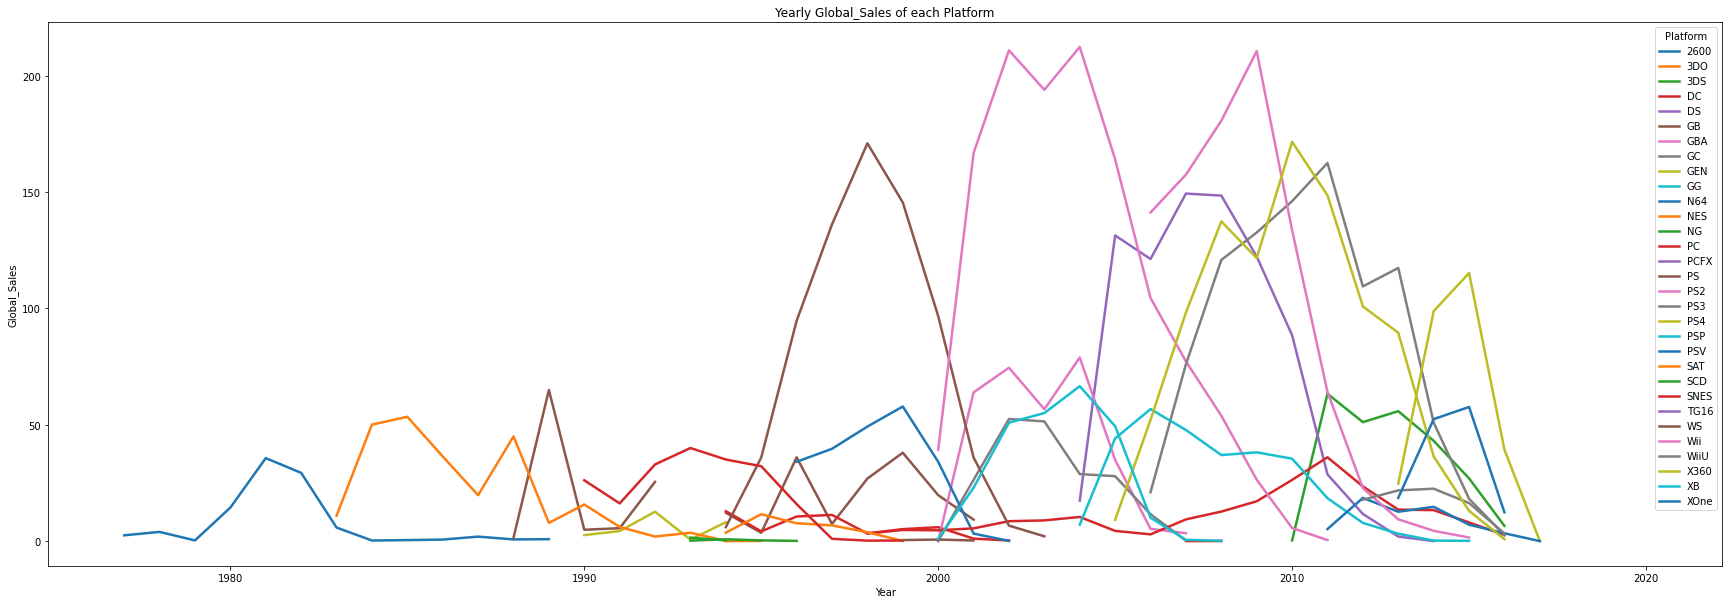

In [128]:
df.groupby(['Year','Platform']).sum()['Global_Sales'].unstack().plot.line(figsize=(30,10), linewidth=2.5, xlabel='Year', ylabel='Global_Sales', title = 'Yearly Global_Sales of each Platform' )

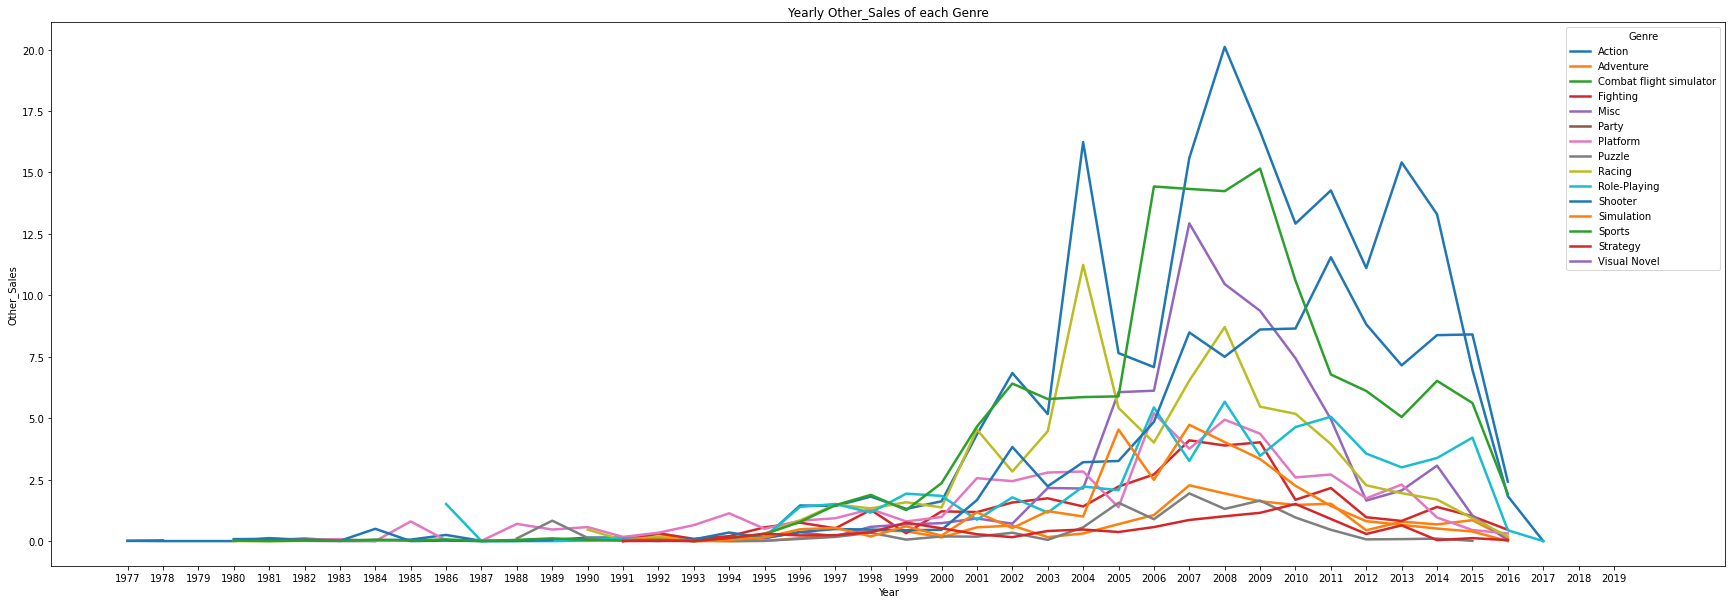

In [131]:
df.groupby(['Year','Genre']).sum()['Other_Sales'].unstack().plot.line(figsize=(30,10), linewidth=2.5, xlabel='Year', ylabel='Other_Sales',xticks=np.arange(1977,2020,1),title = 'Yearly Other_Sales of each Genre' )

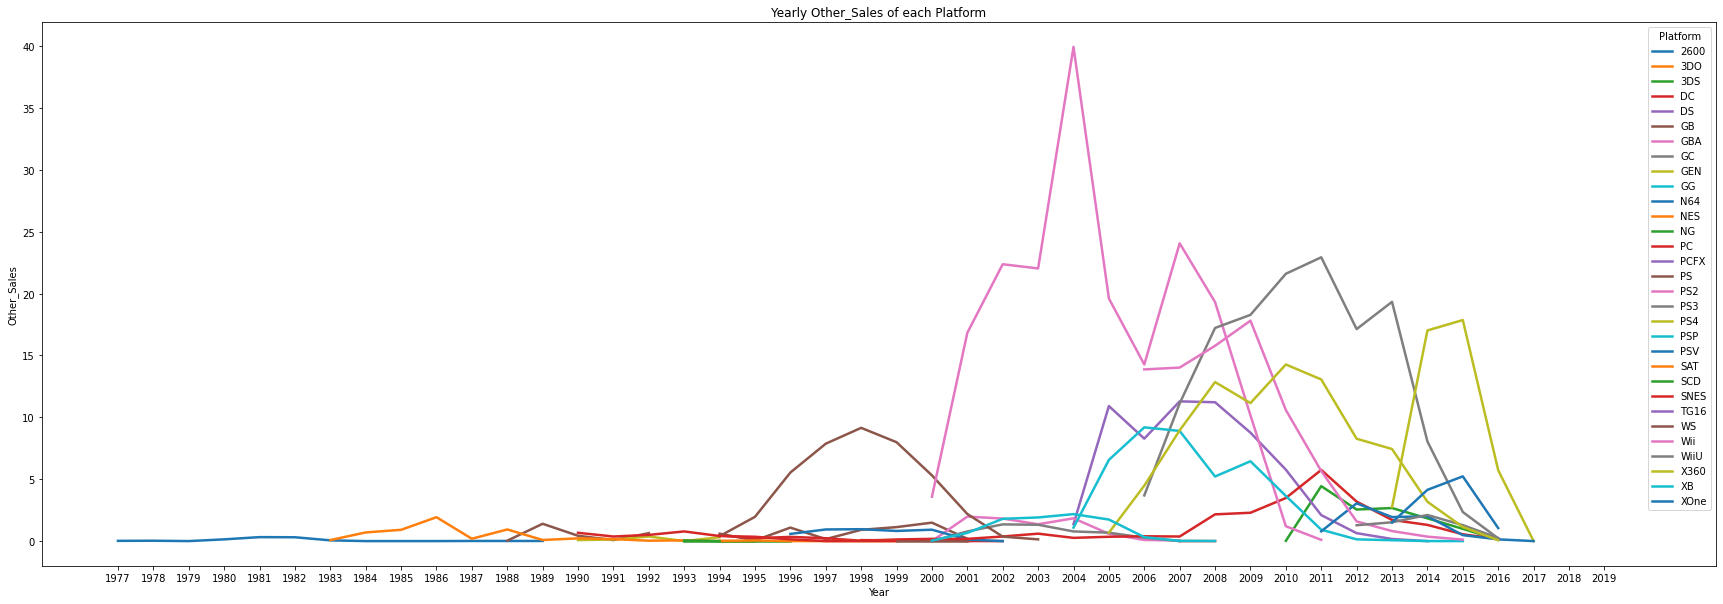

In [130]:
df.groupby(['Year','Platform']).sum()['Other_Sales'].unstack().plot.line(figsize=(30,10), linewidth=2.5, xlabel='Year', ylabel='Other_Sales',xticks=np.arange(1977,2020,1) ,title = 'Yearly Other_Sales of each Platform' )

In [137]:
df[df.Genre =='Action'].sort_values('Other_Sales', ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14669,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
16279,Metal Gear Solid 3: Snake Eater,PS2,2004,Action,Konami Digital Entertainment,1.46,0.00,0.83,1.93,4.22
5340,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
761,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
12908,God of War II,PS2,2007,Action,Sony Computer Entertainment,2.32,0.04,0.04,1.67,4.07
16475,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
9786,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
